## 6.5 Unsupervised Machine Learning - Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/datcaodo/Documents/World Happiness Report 2024'

In [5]:
df = pd.read_csv(os.path.join(path, '/Users/datcaodo/Documents/World Happiness Report 2024', '03 Data', 'df.csv'))

In [6]:
df.shape

(2008, 13)

In [7]:
df.head()

,Unnamed: 0,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Social support category
0,0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,Low Support
1,1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,Low Support
2,2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,Low Support
3,3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,Low Support
4,4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,Low Support


In [8]:
# Removing categorical columns from the data

columns_to_drop = ['Country name', 'Social support category', 'Unnamed: 0']

df.drop(columns_to_drop, axis = 1, inplace = True)

In [10]:
# Checking the output
df.head(5)

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [13]:
# Checking for missung values
missing_values = df.isnull().sum()

In [15]:
missing_values

year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           9
Positive affect                     0
Negative affect                     0
dtype: int64

In [16]:
# Replace missing values with the mean of the column 'Perceptions of corruption'
df.fillna(df.mean(), inplace=True)

### 2. The elbow technique

In [27]:
num_cl = range(1, 30) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [28]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

[-143959.96665780473,
 -74466.52520372464,
 -50201.554889033614,
 -38160.70227696662,
 -31366.376821298152,
 -26334.93653890723,
 -23476.444669653414,
 -20903.49499515314,
 -18491.163411933674,
 -16656.05483916421,
 -14996.952470263437,
 -13967.89247784474,
 -12991.912308143566,
 -12143.204680940966,
 -11480.698864825765,
 -10989.234301555034,
 -10286.820868310826,
 -9720.558407056775,
 -9302.567924970426,
 -8839.831003257394,
 -8481.194646195898,
 -8154.732417036894,
 -7907.186678030774,
 -7599.299838524892,
 -7436.712582968055,
 -7173.948412345548,
 -6943.490567753578,
 -6708.021895971458,
 -6555.557297158901]

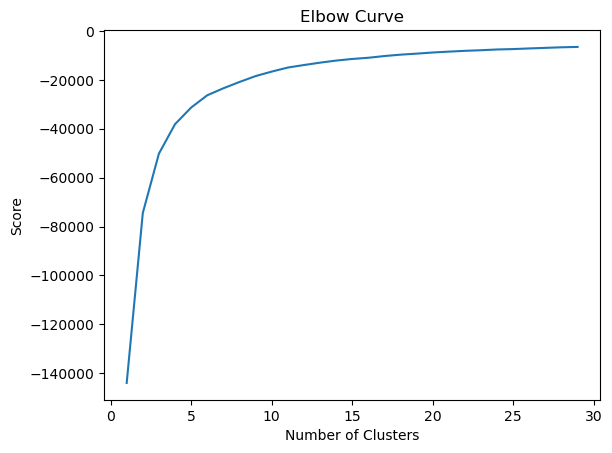

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a turn from 5 to 10 on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is between 5-10. In this case I will be using 5.


### 3. k-means clustering

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 


In [38]:
# Fit the k-means object to the data.

kmeans.fit(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [39]:
df['clusters'] = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [40]:
df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,clusters
0,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258,4
1,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237,4
2,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275,4
3,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267,4
4,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268,4


In [41]:
df['clusters'].value_counts()

clusters
1    626
2    433
0    409
3    374
4    166
Name: count, dtype: int64

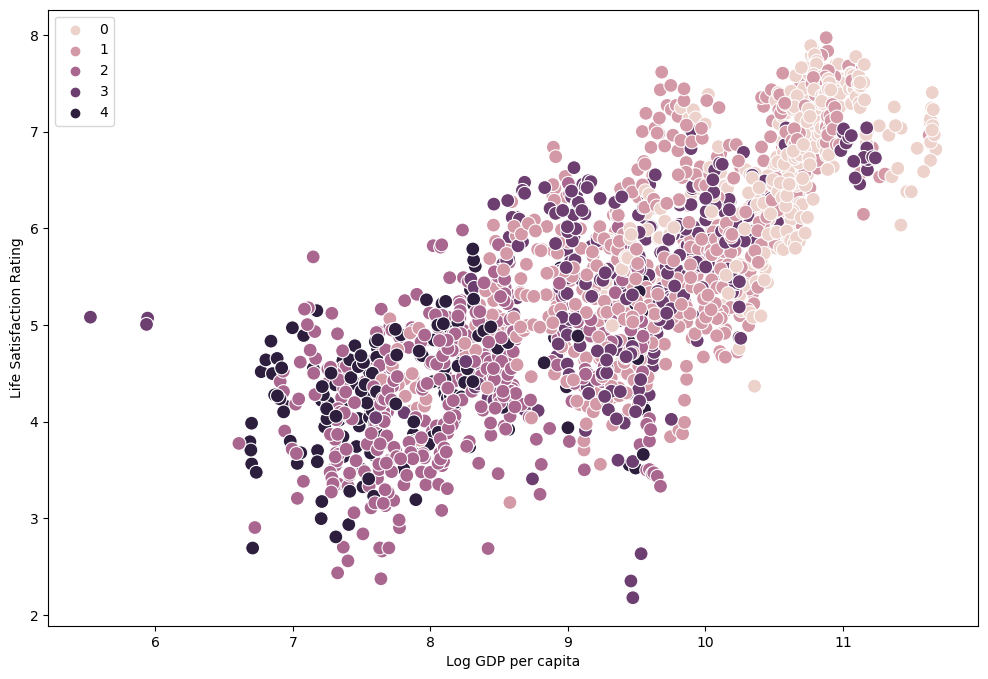

In [42]:
# Plot the clusters for the "Life Ladder" and "Log GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Log GDP per capita'], y=df['Life Ladder'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Log GDP per capita') # Label x-axis.
plt.ylabel('Life Satisfaction Rating') # Label y-axis.
plt.show()

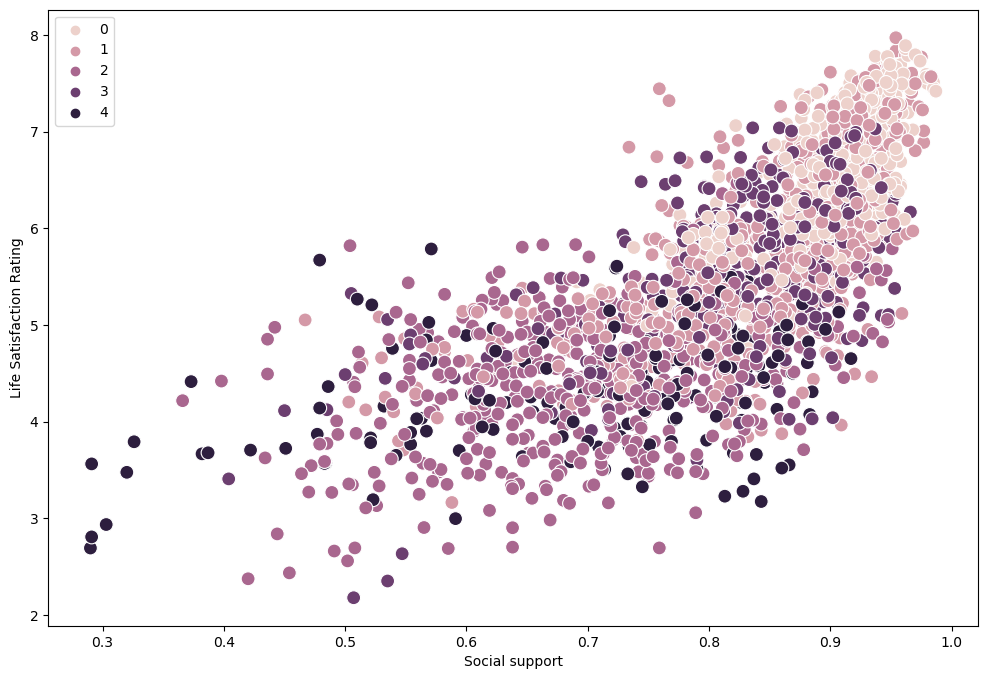

In [43]:
# Plot the clusters for the "Social support" and "Life Ladder" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Social support'], y=df['Life Ladder'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Social support') 
plt.ylabel('Life Satisfaction Rating') 
plt.show()

In [44]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'dark pink'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [45]:
df.groupby('cluster').agg({'Generosity':['mean', 'median'], 
                         'Log GDP per capita':['mean', 'median'], 
                         'Social support':['mean', 'median'],
                          'Life Ladder':['mean', 'median'],
                          'Healthy life expectancy at birth':['mean', 'median'],
                           'Freedom to make life choices':['mean', 'median'],})

Generosity         Log GDP per capita          Social support  \
                  mean  median               mean   median           mean   
cluster                                                                     
dark pink     0.031118  0.0070           8.159042   8.1210       0.694446   
dark purple  -0.002536 -0.0205           7.830657   7.6155       0.701175   
light pink    0.019834  0.0040          10.582039  10.6470       0.897839   
pink         -0.018158 -0.0530           9.710387   9.7550       0.838800   
purple       -0.023701 -0.0610           9.569267   9.5760       0.826027   

                    Life Ladder         Healthy life expectancy at birth  \
             median        mean  median                             mean   
cluster                                                                    
dark pink    0.6940    4.367845  4.4250                        56.532021   
dark purple  0.7360    4.312139  4.3005                        49.977590   
light pink   0.9140    6.608171  6.6650                        70.755452   
pink         0.8600    5.758992  5.6960                        65.785016   
purple       0.8465    5.576080  5.6710                        65.440441   

                     Freedom to make life choices          
              median                         mean  median  
cluster                                                    
dark pink    56.6250                     0.715111  0.7240  
dark purple  51.0300                     0.649711  0.6640  
light pink   71.0000                     0.836516  0.8660  
pink         65.6400                     0.720128  0.7365  
purple       65.7625                     0.789922  0.8190

The light pink cluster has the best stats in almopst all categories. The median of the healthy life expectancy at birth is 71. Social suppot is at 0.91 or in other words 91%. 

The genrosity column doens't seem to matter much. The second-best-rated cluster (dark pink) has a higher mean and median geneoristy than the best (light pink).

I would do more analysis why the light pink is performing so well compared to the other clusters. 

One reason for the limitation of this analysis could be the size of the data. We might need a bigger dataset in order to make more accurate conclusions. 